In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
csv_name = os.path.join('../data', "Multi_Class_annotations.csv")
csv      = pd.read_csv(csv_name, nrows=None)
lables   = csv["class"]
lables   = np.array([i for i in lables])

classes_name = np.unique(lables)
n_classes    = len(classes_name)
images_name  = np.unique(csv["filename"])
n_images     = len(images_name)

print("Number of examples =", lables.shape[0])
print("Number of classes  =", n_classes)
print("Number of images   =", n_images)

Number of examples = 26706
Number of classes  = 20
Number of images   = 2840


In [3]:
classes_count = dict()
for name in classes_name:
    classes_count[name] = np.count_nonzero(lables == name)

for key in classes_count:
    print(key + " : " + str(classes_count[key]))

100_SIGN : 617
110_SIGN : 232
120_SIGN : 145
30_SIGN : 231
50_SIGN : 1593
60_SIGN : 117
70_SIGN : 1407
80_SIGN : 910
90_SIGN : 170
GIVE_WAY : 1837
NO_PARKING : 595
NO_STOPPING_NO_STANDING : 563
OTHER : 3211
PASS_EITHER_SIDE : 187
PASS_LEFT_SIDE : 50
PASS_RIGHT_SIDE : 4129
PEDESTRIAN_CROSSING : 6620
PRIORITY_ROAD : 3769
STOP : 279
URDBL : 44


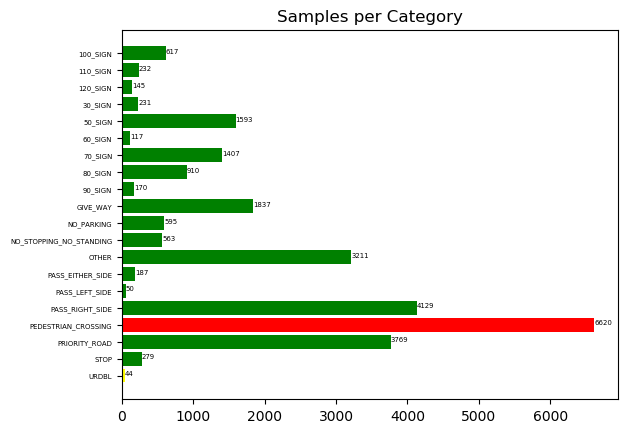

In [4]:
#Use this cell only in case of Multi_Class_Detection
plt.rcdefaults()
fig, ax = plt.subplots()

samples_per_category = [len(np.where(lables==cat_id)[0]) for cat_id in classes_name]
category_names = [str(element) for element in classes_name]

min_cnt = min(samples_per_category)
max_cnt = max(samples_per_category)

y_pos = np.arange(len(category_names))

rects = ax.barh(y_pos, 
                samples_per_category, 
                align='center', 
                color=['green' if val != min_cnt and val != max_cnt \
                       else 'yellow' if val == min_cnt \
                       else 'red' for val in samples_per_category])

# setting labels for each bar
for i in range(0,len(rects)):
    ax.text(int(rects[i].get_width()), 
            int(rects[i].get_y()+rects[i].get_height()/2.0),
            samples_per_category[i],
            fontproperties=fm.FontProperties(size=5))

ax.set_yticks(y_pos)
ax.set_yticklabels(category_names,fontproperties=fm.FontProperties(size=5))
ax.invert_yaxis()
ax.set_title('Samples per Category')

plt.show()

In [5]:
data_Images = csv.groupby('filename')

In [6]:
split = 0.1
test_size  = int(split * n_images)

test_index  = np.random.choice(n_images, size=test_size, replace=False)
train_index = np.setdiff1d(list(range(n_images)), test_index)

print("Train Set Images Number : ", len(train_index))
print("Test  Set Images Number : ", len(test_index))

Train Set Images Number :  2556
Test  Set Images Number :  284


In [7]:
data_Images_list = [data_Images.get_group(x) for x in data_Images.groups]

train = pd.concat([data_Images_list[i] for i in train_index])
test  = pd.concat([data_Images_list[i] for i in test_index])

print("Train Set Size : ", len(train))
print("Test  Set Size : ", len(test))

Train Set Size :  24184
Test  Set Size :  2522


In [8]:
train.to_csv(os.path.join('../data', 'train_labels.csv'), index=None)
test.to_csv(os.path.join('../data', 'test_labels.csv'), index=None)